In [1]:
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
data = pd.read_csv(r'D:\Study\深度学习\日月光华-tensorflow入门与实战资料\数据集\空气污染序列预测数据集\PRSA 2010.1.1-2014.12.31.csv')

In [3]:
data.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [5]:
data.tail()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0
43823,43824,2014,12,31,23,12.0,-21,-3.0,1034.0,NW,249.85,0,0


In [6]:
data['pm2.5'].isna().sum()

2067

In [7]:
data=data.iloc[24:].fillna(method='ffill')

In [8]:
data['pm2.5'].isna().sum()

0

In [9]:
import datetime

In [10]:
datetime.datetime(year=2010,month=1,day=2,hour=1)

datetime.datetime(2010, 1, 2, 1, 0)

In [11]:
data['tm']=data.apply(lambda x: datetime.datetime(year=x['year'],
                                       month=x['month'],
                                       day=x['day'],
                                        hour=x['hour']),
           axis=1
          )

In [12]:
data.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,tm
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0,2010-01-02 00:00:00
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,2010-01-02 01:00:00
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,2010-01-02 02:00:00
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,2010-01-02 03:00:00
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,2010-01-02 04:00:00


In [13]:
data.drop(columns=['year','month','day','hour','No'],inplace=True)

In [14]:
data=data.set_index('tm')

In [15]:
data

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
tm,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0


In [16]:
data.cbwd.unique()

array(['SE', 'cv', 'NW', 'NE'], dtype=object)

In [17]:
data=data.join(pd.get_dummies(data.cbwd))#独热编码

In [18]:
del data['cbwd']

In [19]:
data

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,NE,NW,SE,cv
tm,,,,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,1.79,0,0,0,0,1,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,2.68,0,0,0,0,1,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,3.57,0,0,0,0,1,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,5.36,1,0,0,0,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,6.25,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,231.97,0,0,0,1,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,237.78,0,0,0,1,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,242.70,0,0,0,1,0,0


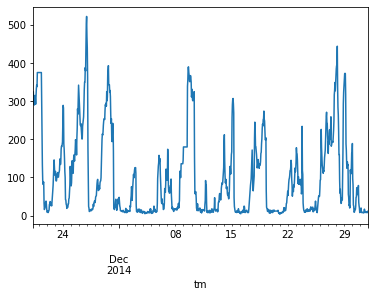

In [20]:
data['pm2.5'][-1000:].plot()

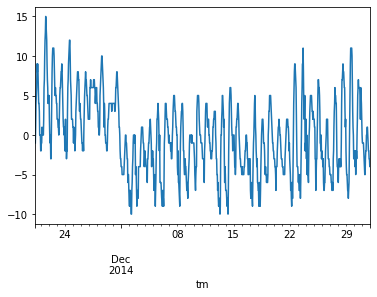

In [21]:
data['TEMP'][-1000:].plot()

In [22]:
seq_length = 5*24
delay = 24

In [56]:
data

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,NE,NW,SE,cv
tm,,,,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,1.79,0,0,0,0,1,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,2.68,0,0,0,0,1,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,3.57,0,0,0,0,1,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,5.36,1,0,0,0,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,6.25,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,231.97,0,0,0,1,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,237.78,0,0,0,1,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,242.70,0,0,0,1,0,0


In [24]:
data_=[]
for i in range(len(data)-seq_length-delay):
    data_.append(data.iloc[i:i+seq_length+delay])

In [25]:
data_[0]

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,NE,NW,SE,cv
tm,,,,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,1.79,0,0,0,0,1,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,2.68,0,0,0,0,1,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,3.57,0,0,0,0,1,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,5.36,1,0,0,0,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,6.25,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2010-01-07 19:00:00,67.0,-18,-11.0,1033.0,1.79,0,0,0,1,0,0
2010-01-07 20:00:00,106.0,-19,-15.0,1032.0,1.79,0,0,1,0,0,0
2010-01-07 21:00:00,159.0,-19,-14.0,1032.0,0.45,0,0,0,0,0,1


In [26]:
data_= np.array([df.values for df in data_])

In [27]:
data_.shape

(43656, 144, 11)

In [28]:
np.random.shuffle(data_)

In [29]:
x=data_[:,:5*24,:]

In [30]:
y=data_[:,-1,0]

In [31]:
x.shape,y.shape

((43656, 120, 11), (43656,))

In [32]:
split_b=int(data_.shape[0]*0.8)

In [33]:
train_x=x[:split_b]
train_y=y[:split_b]
test_x=x[split_b:]
test_y=y[split_b:]

In [34]:
mean=train_x.mean(axis=0)
std=train_x.std(axis=0)

In [35]:
train_x=(train_x-mean)/std
test_x=(test_x-mean)/std

In [36]:
batch_size =128

In [37]:
model=keras.Sequential()
model.add(layers.Flatten(input_shape=(train_x.shape[1:])))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(1))

In [38]:
model.compile(optimizer='adam',
             loss='mse',
             metrics=['mae'])

In [48]:
history=model.fit(train_x,train_y,
                  batch_size=batch_size,
                  epochs=50,
                  validation_data=(test_x,test_y))

Epoch 1/50
273/273 [==============================] - 1s 3ms/step - loss: 10064.7793 - mae: 72.0548 - val_loss: 8175.0464 - val_mae: 67.2476
Epoch 2/50
273/273 [==============================] - 1s 2ms/step - loss: 7681.3687 - mae: 64.8657 - val_loss: 7288.5039 - val_mae: 62.9955
Epoch 3/50
273/273 [==============================] - 1s 2ms/step - loss: 7022.8301 - mae: 61.7162 - val_loss: 6886.2812 - val_mae: 61.2125
Epoch 4/50
273/273 [==============================] - 1s 2ms/step - loss: 6669.6011 - mae: 60.0243 - val_loss: 6650.9658 - val_mae: 59.7256
Epoch 5/50
273/273 [==============================] - 1s 2ms/step - loss: 6442.0166 - mae: 59.0442 - val_loss: 6547.1460 - val_mae: 58.9720
Epoch 6/50
273/273 [==============================] - 1s 2ms/step - loss: 6287.7383 - mae: 58.3881 - val_loss: 6460.3096 - val_mae: 58.4205
Epoch 7/50
273/273 [==============================] - 1s 2ms/step - loss: 6141.8242 - mae: 57.7087 - val_loss: 6335.8838 - val_mae: 58.7268
Epoch 8/50
273/273 

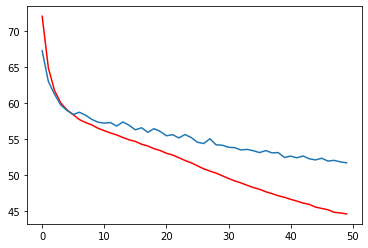

In [50]:
plt.plot(history.epoch,history.history['mae'],c='r')
plt.plot(history.epoch,history.history['val_mae'])

# LSTM

In [45]:
model=keras.Sequential()
model.add(layers.LSTM(32,input_shape=(120,11),return_sequences=True))
model.add(layers.LSTM(32,return_sequences=True))
model.add(layers.LSTM(32,return_sequences=True))
model.add(layers.LSTM(32))
model.add(layers.Dense(1))

In [46]:
lr_reduce = keras.callbacks.ReduceLROnPlateau('val_loss',patience=3,factor=0.5,min_lr= 0.000001)

In [47]:
model.compile(optimizer='adam',
             loss='mse',
             metrics=['mae'])

In [52]:
history=model.fit(train_x,train_y,
                  batch_size=batch_size,
                  epochs=150,
                  callbacks=[lr_reduce],
                  validation_data=(test_x,test_y))

Epoch 1/150
273/273 [==============================] - 7s 27ms/step - loss: 16193.3760 - mae: 88.7008 - val_loss: 14934.2529 - val_mae: 82.5775
Epoch 2/150
273/273 [==============================] - 6s 21ms/step - loss: 14588.3584 - mae: 81.1729 - val_loss: 13630.4707 - val_mae: 77.1305
Epoch 3/150
273/273 [==============================] - 6s 20ms/step - loss: 13371.8047 - mae: 76.3901 - val_loss: 12544.0693 - val_mae: 73.2116
Epoch 4/150
273/273 [==============================] - 6s 21ms/step - loss: 12350.0088 - mae: 72.7791 - val_loss: 11631.5566 - val_mae: 70.2739
Epoch 5/150
273/273 [==============================] - 6s 21ms/step - loss: 11493.3643 - mae: 70.0625 - val_loss: 10873.5498 - val_mae: 68.1423
Epoch 6/150
273/273 [==============================] - 6s 21ms/step - loss: 10746.1699 - mae: 67.9958 - val_loss: 10189.7520 - val_mae: 66.5439
Epoch 7/150
273/273 [==============================] - 5s 19ms/step - loss: 10124.6738 - mae: 66.5946 - val_loss: 9667.8994 - val_mae: 6

InternalError:    Failed to call ThenRnnBackward with model config: [rnn_mode, rnn_input_mode, rnn_direction_mode]: 2, 0, 0 , [num_layers, input_size, num_units, dir_count, max_seq_length, batch_size, cell_num_units]: [1, 32, 32, 1, 120, 128, 32] 
	 [[{{node gradients/CudnnRNN_grad/CudnnRNNBackprop}}]]
	 [[PartitionedCall_1]] [Op:__inference_train_function_13230]

Function call stack:
train_function -> train_function -> train_function


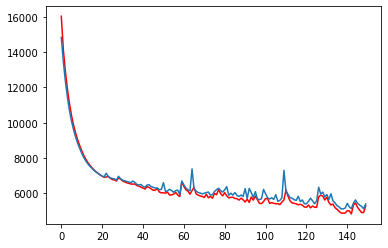

In [42]:
plt.plot(history.epoch,history.history['loss'],c='r')
plt.plot(history.epoch,history.history['val_loss'])

# LSTM层的优化和在训练中降低学习速率

In [ ]:
model.save('pm2.5_v3.h5')

In [ ]:
model.evaluate(test_x,test_y,verbose=0)

In [ ]:
pre_test=model..predict(test_x)

In [58]:
data_test=data[-120:]

In [59]:
data_test= data_test.iloc[:,5:]

In [61]:
data_test

,Is,Ir,NE,NW,SE,cv
tm,,,,,,
2014-12-27 00:00:00,0,0,0,1,0,0
2014-12-27 01:00:00,0,0,0,1,0,0
2014-12-27 02:00:00,0,0,0,1,0,0
2014-12-27 03:00:00,0,0,0,1,0,0
2014-12-27 04:00:00,0,0,0,1,0,0
...,...,...,...,...,...,...
2014-12-31 19:00:00,0,0,0,1,0,0
2014-12-31 20:00:00,0,0,0,1,0,0
2014-12-31 21:00:00,0,0,0,1,0,0


In [60]:
data._test=data_test.join(pd.get_dummies(data_test.cbwd))

AttributeError: 'DataFrame' object has no attribute 'cbwd'

In [ ]:
data_test.drop('cbwd',axis=1,inplace=True)

In [ ]:
data_test=(data_test-mean)/std

In [ ]:
data_test =data_test.to_numpy()

In [ ]:
data_test=np.expand_dims(data_test,0)